<a href="https://colab.research.google.com/github/calvinzend/Belajar-Klasifikasi-Mangga/blob/master/Belajar_Klasifikasi_Mangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("data2.csv")
df

,No,Weight,Length,Circumference,Grade
0,1,486.5,14.0,27.0,A
1,2,388.4,12.0,26.0,A
2,3,493.7,12.0,26.5,A
3,4,342.5,10.0,24.3,A
4,5,401.5,11.0,25.0,A
...,...,...,...,...,...
100,101,296.0,11.7,22.2,C
101,102,306.1,11.9,22.7,C
102,103,240.0,10.2,20.8,C
103,104,268.4,10.7,20.9,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             105 non-null    int64  
 1   Weight         105 non-null    float64
 2   Length         105 non-null    float64
 3   Circumference  105 non-null    float64
 4   Grade          105 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


In [ ]:
df.drop(labels = 'No',axis = 1,inplace = True)

In [ ]:
df.describe()

,Weight,Length,Circumference
count,105.000000,105.000000,105.000000
mean,351.010476,11.988571,23.820952
std,74.172386,1.250486,2.235238
min,235.000000,10.000000,20.300000
25%,290.500000,10.900000,21.700000
50%,341.700000,11.800000,24.000000
75%,407.900000,12.800000,25.800000
max,571.900000,15.400000,29.900000


In [ ]:
df["Grade"].value_counts()

,count
Grade,
C,38
A,34
B,33


<Figure size 1280x960 with 0 Axes>

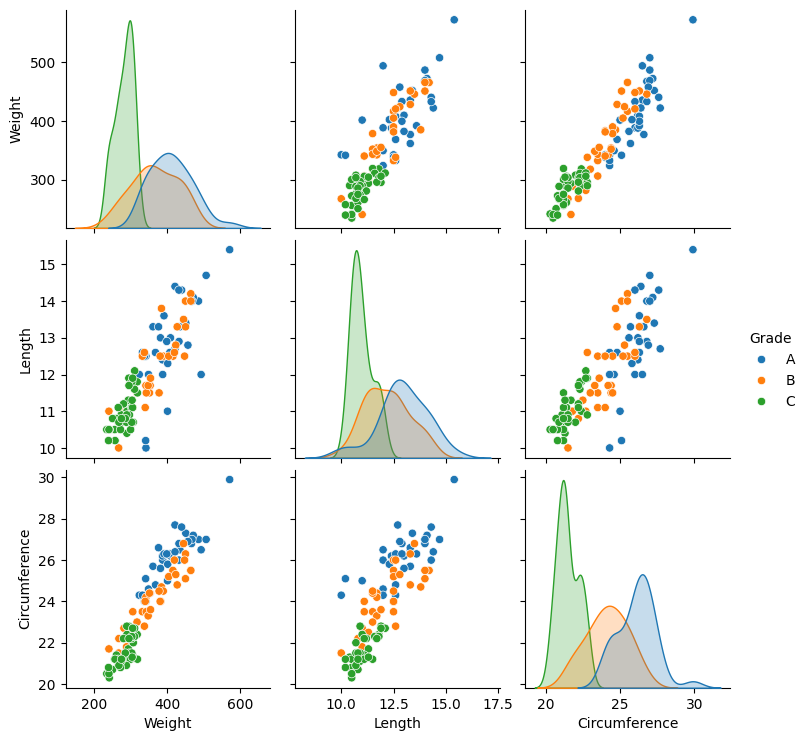

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi = 200)
sns.pairplot(df,hue = 'Grade')

In [ ]:
df.groupby('Grade').mean()

,Weight,Length,Circumference
Grade,,,
A,412.126471,12.944118,26.117647
B,367.160606,12.178788,24.130303
C,282.302632,10.968421,21.497368


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
X = df[["Weight","Length","Circumference"]]
y = df["Grade"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=66
)

data_colums = ["Weight","Length","Circumference"]

In [ ]:
model = Pipeline(
    steps=[
        ("scaler",StandardScaler()),
        ("model",LogisticRegression())
    ]
)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("\nClassification Report\n",classification_report(y_test, y_pred))
print("\nConfusion Matrix\n",confusion_matrix(y_test, y_pred))

Accuracy =  0.8095238095238095

Classification Report
               precision    recall  f1-score   support

           A       1.00      0.73      0.85        15
           B       0.60      0.60      0.60        10
           C       0.81      1.00      0.89        17

    accuracy                           0.81        42
   macro avg       0.80      0.78      0.78        42
weighted avg       0.83      0.81      0.81        42


Confusion Matrix
 [[11  4  0]
 [ 0  6  4]
 [ 0  0 17]]


In [ ]:
data_baru = pd.DataFrame([[324.2,13,25]],
                         columns=data_colums)
print(model.predict_proba(data_baru))
print(model.predict(data_baru))

[[0.71772708 0.24070396 0.04156896]]
['A']
